<a href="https://colab.research.google.com/github/cataluna84/Google-Startup-School-AI-Q1-2025/blob/main/startup_school_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to [Goo.gle/LuisLab](https://goo.gle/LuisLab)

# 1.0 - Introduction

This Colab notebook guides developers through various exercises intended to educate the reader on how to begin building Generative AI applications powered by Google Gemini and Vertex AI on Google Cloud.

Exercises include:

1.   Setup
2.   Using the Google Gen AI SDK: Text Prompts & Image Generation
3.   Alternate APIs via OpenAI Compatibility or LiteLLM
4.   Structured Output
5.   Function Calling
6.   Grounding with Google Search
7.   Processing Web Pages
8.   Build an Agent with Gemini & CrewAI



# 2.0 - Initial Setup

## Pre-requisites

### 1. Create a Google Cloud account and (optional) organization:
* https://cloud.google.com/free
* https://cloud.google.com/docs/get-started

### 2. Create a GCP Project
* https://console.cloud.google.com/projectcreate
* Take note of the new project's ID.

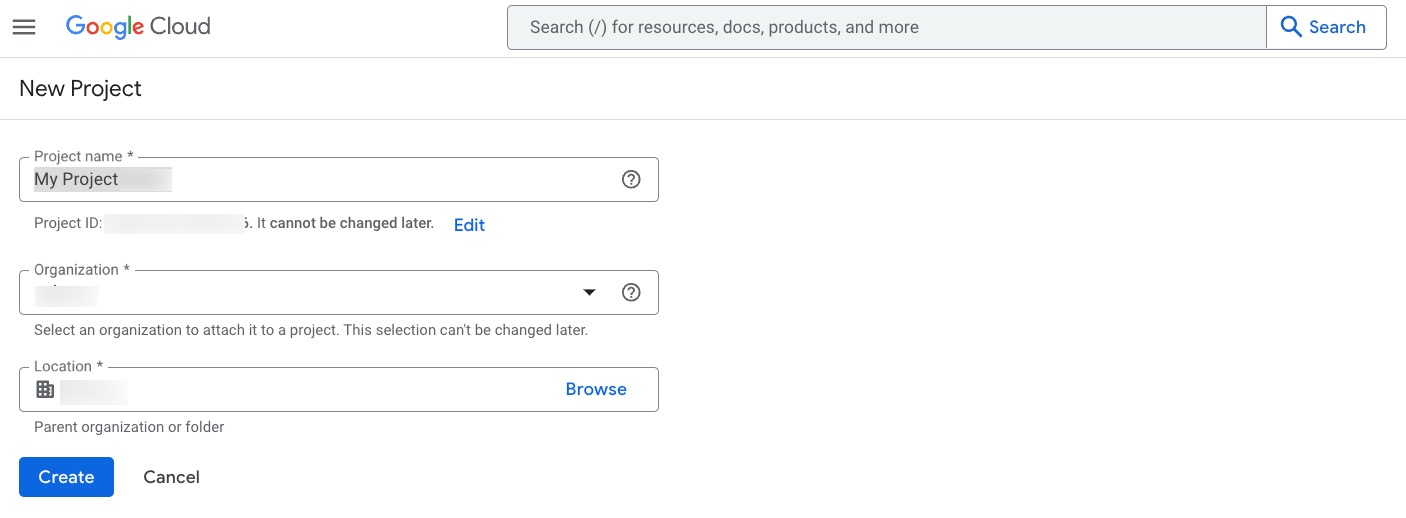

### 3. Select the Project and Search for Vertex AI
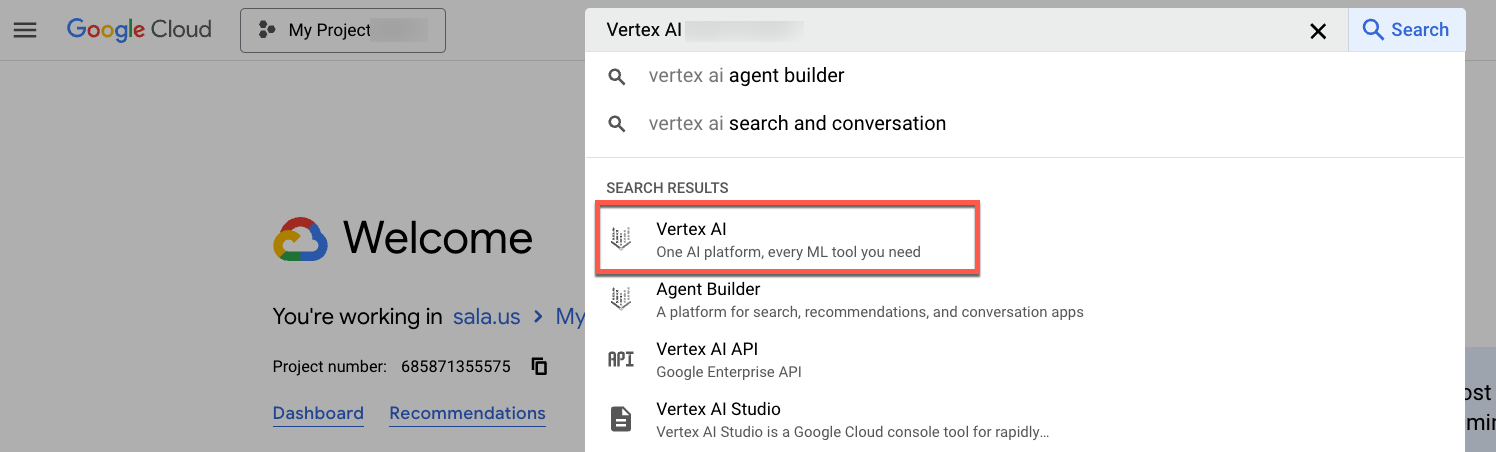

### 4. Enable Recommended APIs
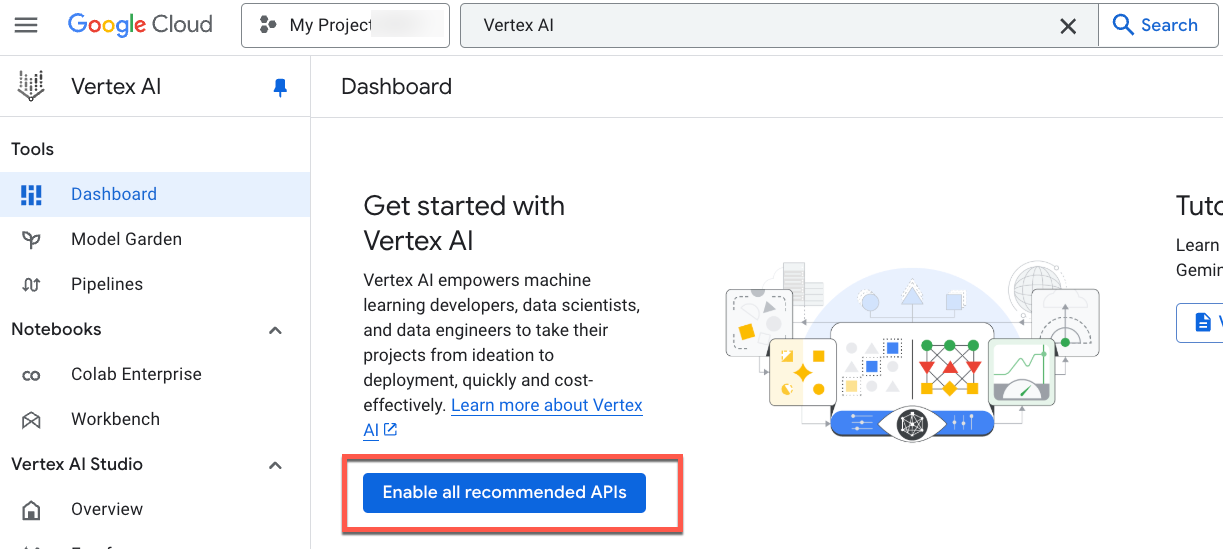

### 5. Test Vertex AI Studio
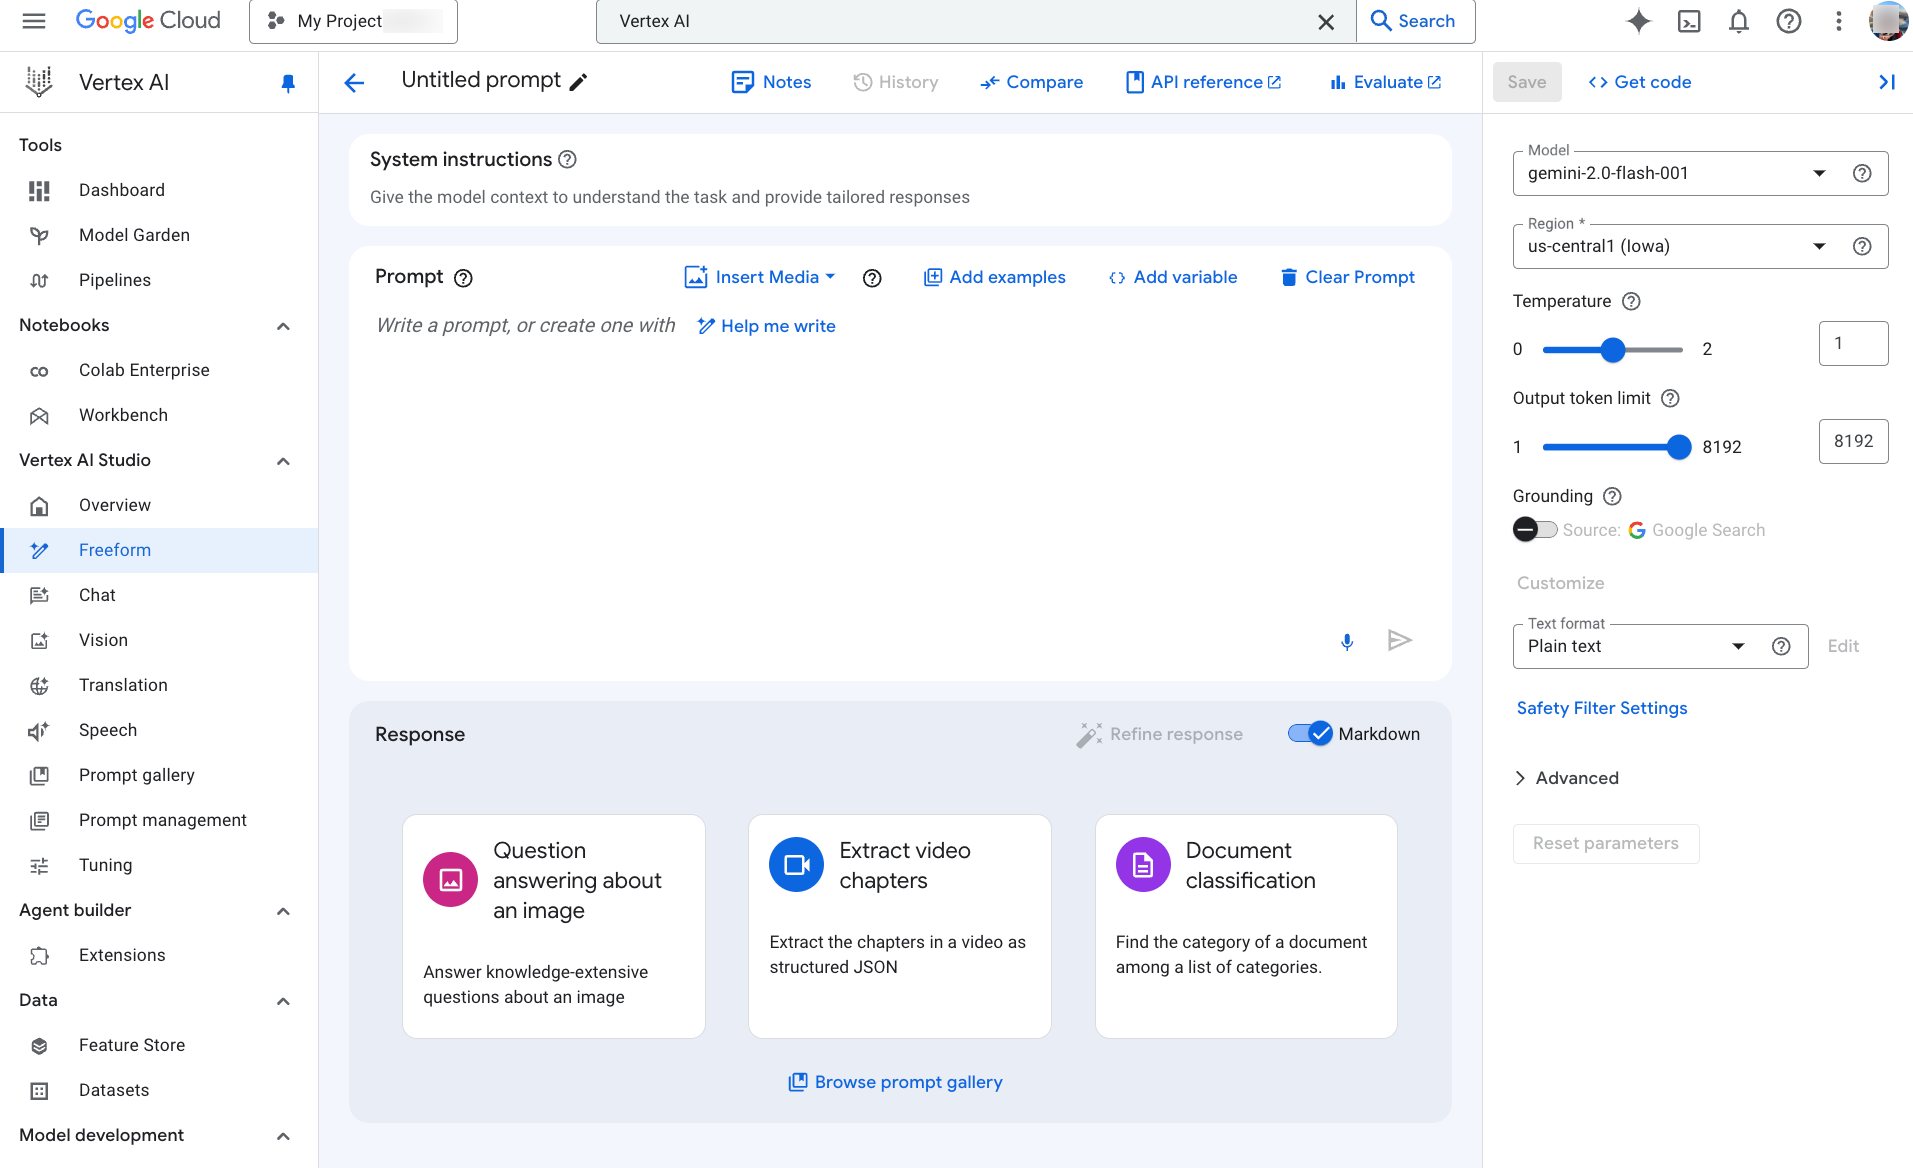

## Install Dependencies

In [1]:
!pip install -U -q google-genai
!pip install -U -q google-cloud-storage
!pip install -U -q playwright
!pip install -U -q requests
!pip install -U -q openai
!pip install -U -q google-auth
!playwright install --with-deps chromium
!pip install -U -q crewai-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 2.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-aiplatform 1.79.0 requires google-cloud-storage<3.0.0dev,>=1.32.0, but you have google-cloud-storage 3.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 3.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.27.0, but you have google-auth 2.38.0 which is incompatible.
goog

## Restart the Colab Session

To use the newly installed packages in this Colab runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

Technically optional since Colab should prompt to restart the session after installing the dependencies above.

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Authenticate with Google Cloud (Colab Only)
Google Colab projects can authenticate against Google Cloud via the following calls. It is not required if running on Colab Enterprise or Vertex AI Workbench.

Running the cell below sets up the "[Application Default Credentials](https://cloud.google.com/docs/authentication/provide-credentials-adc)." which are used by our SDKs to automatically authenticate against Google Cloud Services.

In short, this is equivalent to the following gcloud CLI commands:
```bash
$ gcloud auth login
$ gcloud auth application-default login
```

An authentication pop-up will appear, please accept the permissions before proceeding.

### Alternative: Using Gemini API Keys
Some of these code samples will only work with a Google Cloud account, but the basic Gemini SDK will also work via an API key that can be obtained from [Google AI Studio](https://aistudio.google.com).

**Steps:**
1. Get an API key from: https://aistudio.google.com/app/apikey
2. Create a Colab "secret" called `AI_STUDIO_API_KEY` in the "Secrets" tab on the left hand side of Colab.
3. Make sure that `PROJECT_ID` *is not* defined. This ensures that AI Studio's API key will be used instead.

In [1]:
from google.colab import userdata
from google.colab import auth
import sys

# Leave PROJECT_ID Blank to use an API Key instead
PROJECT_ID = "gen-ai-quickstart" # @param {type: "string"}
LOCATION = "us-central1" # @param {type: "string"}
BUCKET = "" # @param{type:"string"}



if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user(project_id=PROJECT_ID)

## Enable Google Cloud Services

In [ ]:
# !gcloud services enable \
# cloudresourcemanager.googleapis.com \
# aiplatform.googleapis.com \
# documentai.googleapis.com \
# notebooks.googleapis.com \
# visionai.googleapis.com \
# storage-component.googleapis.com \
# cloudaicompanion.googleapis.com \
# discoveryengine.googleapis.com \
# --project {PROJECT_ID}

# 3.0 - Using the Google Gen AI SDK

- **SDK Documentation:** https://googleapis.github.io/python-genai
- **Github Source Code:** https://github.com/googleapis/python-genai

## Model Options
This code sample includes Gemini 2.0, 1.5, and Meta Llama 3


## Quick Example


### Initialize the Client Library
We initialize the client by first determining whether or not to use Vertex AI by checking if "PROJECT_ID" is empty.

In [2]:
from google import genai
from google.genai import types
from IPython.display import Markdown

# Initialize the client by first determining whether or not to use Vertex AI
# by checking if "PROJECT_ID" is empty.
if PROJECT_ID == "":
  GOOGLE_API_KEY=userdata.get('AI_STUDIO_API_KEY')
  client = genai.Client(api_key=GOOGLE_API_KEY)
else:
  client = genai.Client(project=PROJECT_ID, location="us-central1", vertexai=True)

### Call Gemini 2.0 Flash

In [3]:
response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents="What's the largest planet in our solar system? Tell me 3 facts about it."
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

Here are 3 facts about Jupiter:

1.  **It's a Gas Giant:** Jupiter is primarily made of hydrogen and helium, with no solid surface. Its composition is similar to that of the Sun, but it didn't gather enough mass to become a star itself.

2.  **The Great Red Spot:** This iconic feature is a persistent anticyclonic storm larger than Earth that has been raging for at least 350 years. It's a swirling vortex of high-pressure gas.

3.  **It has a Strong Magnetic Field:** Jupiter has the strongest planetary magnetic field in the Solar System, almost 20,000 times more powerful than Earth's. This powerful magnetic field creates intense belts of radiation and auroras at the planet's poles.


## View the Response object

Note `usage_metadata` which includes token counts (useful when estimating costs)


In [4]:
print(response.model_dump_json(indent=2))

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "video_metadata": null,
            "thought": null,
            "code_execution_result": null,
            "executable_code": null,
            "file_data": null,
            "function_call": null,
            "function_response": null,
            "inline_data": null,
            "text": "The largest planet in our solar system is **Jupiter**.\n\nHere are 3 facts about Jupiter:\n\n1.  **It's a Gas Giant:** Jupiter is primarily made of hydrogen and helium, with no solid surface. Its composition is similar to that of the Sun, but it didn't gather enough mass to become a star itself.\n\n2.  **The Great Red Spot:** This iconic feature is a persistent anticyclonic storm larger than Earth that has been raging for at least 350 years. It's a swirling vortex of high-pressure gas.\n\n3.  **It has a Strong Magnetic Field:** Jupiter has the strongest planetary magnetic field in the Solar System, almost 20,000 

### Chat with a Model (Bonus: Streaming Content)
The previous examples use `client.models.generate_content()` but one can use `client.chats.create()` to create a chat that inherently remembers past conversations, effectively giving the model a "memory" as "big" as the context window.

This example also demonstrates streaming by printing out the chunks as they arrive.

**Learn more at:** https://googleapis.github.io/python-genai/#chats

In [5]:
chat = client.chats.create(model='gemini-2.0-flash-001')
for chunk in chat.send_message_stream("Tell me 3 facts about Jupiter and its moons"):
    print(chunk.text, end="")

Okay, here are 3 facts about Jupiter and its moons:

1.  **Jupiter has the largest moon in the solar system:** Ganymede is bigger than the planet Mercury and is the only moon in the solar system known to have its own magnetic field.

2.  **Europa may harbor a liquid water ocean beneath its icy crust:**  Scientists believe that tidal forces from Jupiter keep Europa's interior warm enough to maintain a liquid ocean, making it a prime candidate in the search for extraterrestrial life. Evidence supports this theory, but is not yet confirmed.

3.  **Io is the most volcanically active world in the solar system:**  Tidal forces from Jupiter and the other Galilean moons squeeze Io, generating tremendous heat within its interior. This leads to hundreds of active volcanoes erupting constantly across its surface.


#### Chat "Memory" Test

Here we use the same `chat` instance to continue the conversation, which demonstrates that the message history is stored by the chat instance.

In this case, the model should return additional information about Jupiter.

In [6]:
for chunk in chat.send_message_stream("Tell me more..."):
    print(chunk.text, end="")

Okay, let's dive a bit deeper into each of those facts:

**1. Ganymede: The Giant Moon with its Own Magnetic Field**

*   **Size Matters:** Ganymede has a diameter of about 5,268 kilometers (3,273 miles). That's bigger than both Mercury and the dwarf planet Pluto. If Ganymede orbited the Sun instead of Jupiter, it would easily qualify as a planet.
*   **A Hidden Ocean?:** Like Europa, scientists also suspect Ganymede might have a subsurface ocean of liquid water. However, the ocean on Ganymede is thought to be much deeper and sandwiched between layers of ice.
*   **Magnetic Shield:** Ganymede's magnetic field is generated by the movement of molten iron within its core, similar to how Earth's magnetic field is created. This magnetic field creates a mini-magnetosphere around Ganymede, protecting it from the harsh radiation environment around Jupiter.
*   **Complex Surface:** Ganymede's surface is a mix of old, heavily cratered dark regions and younger, lighter grooved terrain. These groo

### Let's try Llama!
The same function can access other hosted pay-as-you-go (PAYG) models!

**Note:** Llama 3.1 will need to be enabled via [Model Garden](https://console.cloud.google.com/vertex-ai/publishers/meta/model-garden/llama-3.1-405b-instruct-maas)

In [8]:
response = client.models.generate_content(
    model="meta/llama-3.1-8b-instruct-maas",
    contents="What's the largest planet in our solar system? Tell me 3 facts about it."
)

Markdown(response.text)

The largest planet in our solar system is Jupiter. Here are three interesting facts about it:

1. **Massive Size**: Jupiter is the largest of all the planets in terms of both mass and size. It has a diameter of approximately 142,984 kilometers (88,846 miles), which is more than 11 times the diameter of the Earth.

2. **Atmospheric Composition**: Jupiter's atmosphere is primarily composed of hydrogen (about 75%) and helium (about 24%). It also contains smaller amounts of other gases, including methane, ammonia, and water vapor. The planet's atmosphere is known for its vibrant cloud bands, which are made up of different types of clouds and hazes.

3. **Moons and Magnetic Field**: Jupiter has a total of 92 confirmed moons, with four of them being particularly large: Io, Europa, Ganymede, and Callisto. These moons are known as the Galilean moons, as they were discovered by Galileo Galilei in 1610. Jupiter also has a very strong magnetic field, which is powered by its rapid rotation and convection in the planet's liquid metal hydrogen core. This magnetic field is so strong that it traps charged particles from the solar wind, creating a region around Jupiter known as the magnetosphere.

### System Instructions & Advanced Configuration
This example uses customized safety settings and generation configuration.

In [9]:
from IPython.display import Markdown

# The default safety settings should be sufficient for most scenarios.
# Optionally, developers can customize the safety settings.
# Learn more at:
# - https://googleapis.github.io/python-genai/index.html#safety-settings
# - https://cloud.google.com/vertex-ai/generative-ai/docs/learn/responsible-ai
CUSTOM_SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH",
        threshold="BLOCK_ONLY_HIGH",
    ),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
        threshold="BLOCK_ONLY_HIGH",
    ),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

# Create a custom generation config to customize settings, such as temperature,
# response type, etc.
# - https://googleapis.github.io/python-genai/index.html#typed-config
MODEL_ID= 'gemini-2.0-flash-001' # @param ["gemini-2.0-flash-001", "gemini-2.0-flash-lite-preview-02-05", "gemini-2.0-pro-exp-02-05","gemini-2.0-flash-thinking-exp-01-21", "gemini-1.5-flash-002", "gemini-1.5-pro-002", "meta/llama-3.2-90b-vision-instruct-maas", "meta/llama-3.1-405b-instruct-maas","meta/llama-3.1-70b-instruct-maas","meta/llama-3.1-8b-instruct-maas"]
TEMPERATURE= 1 # @param {type:"slider", min:0, max:2, step:0.01}
TOP_P = 0.95 # @param {type:"slider", min:0, max:1, step:0.05}
TOP_K = 40 # @param {type:"slider", min:1, max:40, step:1}
MAX_OUTPUT_TOKENS = 8192 # @param {type:"slider", min:64, max:8192, step:64}
RESPONSE_TYPE = 'text/plain' # @param ["text/plain", "application/json'"]
SYSTEM_INSTRUCTION = "Speak like Shakespeare. Format your responses in markdown. Use lots of emoji." # @param {type:"string"}
PROMPT = "Tell me 3 facts about Jupiter." # @param {type:"string"}

CUSTOM_GENERATION_CONFIG = {
    "max_output_tokens": MAX_OUTPUT_TOKENS,
    "temperature": TEMPERATURE,
    "top_p": TOP_P,
    "top_k": TOP_K,
    "safety_settings": CUSTOM_SAFETY_SETTINGS,
    "responseMimeType": RESPONSE_TYPE,
    "system_instruction": SYSTEM_INSTRUCTION
}

response = client.models.generate_content(
    model=MODEL_ID,
    config=CUSTOM_GENERATION_CONFIG,
    contents=PROMPT
)

Markdown(response.text)

Hark, traveler, and lend thine ear to these celestial tidbits about the mighty Jove, 🪐 king of the planets:

1.  'Tis a behemoth of a sphere, 👑 largest of all the planets in our solar domain, with a mass exceeding that of all other planets combined! Verily, it doth boast a size most impressive! 😮
2.  A Great Red Spot, a tempestuous storm ⛈️ that hath raged for centuries, doth adorn its countenance. A swirling vortex of fury, 😠 it is a spectacle most fearsome to behold!
3.  Jupiter doth possess a multitude of moons, 🌕 many of which are fascinating worlds in their own right. Amongst these, Europa doth harbor a hidden ocean 🌊 beneath its icy shell, tantalizing astronomers with the prospect of life! 👽


---
---

# 4.0 - Alternate APIs & SDKS

Vertex-hosted models can be accessed via an OpenAI-compatible completions API, which means that any OpenAI-compatible SDK *should* work with Gemini and other Vertex Model Garden-hosted models.

## OpenAI-Compatible API
The [Gemini Chat Completions API](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/call-vertex-using-openai-library) is an OpenAI compatible API that uses OAuth to authenticate with a short-lived access token.

By default, access tokens last for 1 hour. You can extend the life of your access token or periodically refresh your token and update the OPENAI_API_KEY environment variable.

In [10]:
from google.auth import default
import google.auth.transport.requests
import openai


# Programmatically get an access token
credentials, _ = default(scopes=["https://www.googleapis.com/auth/cloud-platform"])
credentials.refresh(google.auth.transport.requests.Request())

# OpenAI Client
openai_client = openai.OpenAI(
    base_url=f"https://{LOCATION}-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/{LOCATION}/endpoints/openapi",
    api_key=credentials.token,
)

response = openai_client.chat.completions.create(
    model="google/gemini-2.0-flash-001",
    messages=[{"role": "user",
               "content": "Tell me 3 facts about Jupiter and its moons?"
               }],
)

print(response.to_json(indent=2))
print("---")
Markdown(response.choices[0].message.content)

{
  "id": "2025-02-25|09:45:44.583531-08|7.226.200.94|-1810074414",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "Okay, here are 3 facts about Jupiter and its moons:\n\n1.  **Jupiter has the most moons in our solar system:** As of 2023, Jupiter has 95 confirmed moons, making it the planet with the most natural satellites in our solar system. This number can change as new moons are discovered.\n\n2.  **Europa, one of Jupiter's Galilean moons, likely has a saltwater ocean beneath its icy surface:** Scientists believe this ocean could potentially harbor life, making Europa a prime target for future exploration missions.\n\n3.  **Io, another Galilean moon, is the most volcanically active world in the Solar System:** Its surface is constantly being reshaped by hundreds of active volcanoes, spewing sulfurous plumes hundreds of kilometers high. This extreme volcanic activity is caused by tidal forces from J

Okay, here are 3 facts about Jupiter and its moons:

1.  **Jupiter has the most moons in our solar system:** As of 2023, Jupiter has 95 confirmed moons, making it the planet with the most natural satellites in our solar system. This number can change as new moons are discovered.

2.  **Europa, one of Jupiter's Galilean moons, likely has a saltwater ocean beneath its icy surface:** Scientists believe this ocean could potentially harbor life, making Europa a prime target for future exploration missions.

3.  **Io, another Galilean moon, is the most volcanically active world in the Solar System:** Its surface is constantly being reshaped by hundreds of active volcanoes, spewing sulfurous plumes hundreds of kilometers high. This extreme volcanic activity is caused by tidal forces from Jupiter and the other Galilean moons.


---
---

## Using LiteLLM
[LiteLLM](https://docs.litellm.ai/docs/) is a **Python library and SDK** designed to simplify the integration and usage of various large language model (LLM) APIs. It provides a unified interface to access over 100 LLM services from providers such as OpenAI, Azure, HuggingFace, Cohere, and more.

Key features include:
- **Efficiency and Scalability**: LiteLLM addresses the limitations of traditional large-scale language models by focusing on performance and scalability, making it suitable for diverse applications in natural language processing (NLP).
- **Unified API Gateway**: It acts as a proxy server, enabling developers to call multiple LLM APIs in a standardized OpenAI-compatible format.
- **Structured Outputs**: LiteLLM supports generating structured, type-safe outputs across different LLM providers, enhancing usability and consistency.

This makes LiteLLM a powerful tool for developers looking to streamline their interaction with multiple LLM platforms.


### Authenticating with LiteLLM
LiteLLM natively supports Application Default Credentials, but also supports Service Accounts. Refer to the [LiteLLM documentation](https://docs.litellm.ai/docs/providers/vertex) for more details.

In [11]:
from litellm import completion

## COMPLETION CALL
response = completion(
  model="vertex_ai/gemini-2.0-flash-001",
  messages=[{
             "content": "Tell me three facts about Jupiter",
             "role": "user"
             }],
)

print(response.to_json(indent=2))
print("---")
Markdown(response.choices[0].message.content)

{
  "id": "chatcmpl-f053263f-bf6f-4eef-b0e0-52f3f389914b",
  "created": 1740505674,
  "model": "gemini-2.0-flash-001",
  "object": "chat.completion",
  "system_fingerprint": null,
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Okay, here are three facts about Jupiter:\n\n1.  **Jupiter is the largest planet in our solar system.** It's so big that you could fit all the other planets inside it. It has a diameter of about 140,000 kilometers (87,000 miles), which is about 11 times the diameter of Earth.\n\n2.  **Jupiter has a giant storm called the Great Red Spot that has been raging for at least 350 years.** This storm is larger than Earth itself and is a high-pressure region in Jupiter's atmosphere.\n\n3.  **Jupiter has a very strong magnetic field.** It is about 20,000 times stronger than Earth's magnetic field. This strong magnetic field creates intense radiation belts around the planet.\n",
        "role": "assistant",
     

Okay, here are three facts about Jupiter:

1.  **Jupiter is the largest planet in our solar system.** It's so big that you could fit all the other planets inside it. It has a diameter of about 140,000 kilometers (87,000 miles), which is about 11 times the diameter of Earth.

2.  **Jupiter has a giant storm called the Great Red Spot that has been raging for at least 350 years.** This storm is larger than Earth itself and is a high-pressure region in Jupiter's atmosphere.

3.  **Jupiter has a very strong magnetic field.** It is about 20,000 times stronger than Earth's magnetic field. This strong magnetic field creates intense radiation belts around the planet.


### LiteLLM Routing for Load Balancing and Fallbacks
This example will load-balance between Gemini in the US and EU and fallback to Llama 3.1.

Learn about LiteLLM Routing [here](https://docs.litellm.ai/docs/routing-load-balancing).

In [12]:
from litellm import Router
import json

model_list = [{ # list of model deployments
    "model_name": "gemini_2.0", # model alias -> loadbalance between models with same `model_name`
    "litellm_params": { # params for litellm completion/embedding call
        "model": "vertex_ai/gemini-2.0-flash-001", # actual model name
        "vertex_project": PROJECT_ID,
        "vertex_location": "us-central1"
    }
 },
 {
    "model_name": "gemini_2.0", # model alias -> loadbalance between models with same `model_name`
    "litellm_params": { # params for litellm completion/embedding call
        "model": "vertex_ai/gemini-2.0-flash-001", # actual model name
        "vertex_project": PROJECT_ID,
        "vertex_location": "eu-west4"
    }
 },
 {
    "model_name": "llama_3.1",
    "litellm_params": { # params for litellm completion/embedding call
        "model": "vertex_ai/meta/llama-3.1-8b-instruct-maas",
        "vertex_project": PROJECT_ID,
        "vertex_location": "us-central1"
    }
 }]


# Configure fallback
fallbacks=[{"gemini_2.0": ["llama_3.1"]}] # 👈 KEY CHANGE

# Initialize our router
router = Router(model_list=model_list, fallbacks=fallbacks)

# This is analogous to openai.ChatCompletion.create
# Requests with model="gemini_2.0" will pick a deployment where model_name="vertex_ai/gemini-2.0-flash-001"
response = router.completion(
    model="gemini_2.0",
    messages=[{"role": "user", "content": "Tell me 3 facts about Jupiter?"}],
    mock_testing_fallbacks=False
    )

print(response.to_json(indent=2))
print("---")
Markdown(response.choices[0].message.content)

{
  "id": "2025-02-25|09:48:33.542677-08|2.24.203.199|1880664569",
  "created": 1740505713,
  "model": "vertex_ai/meta/llama-3.1-8b-instruct-maas",
  "object": "chat.completion",
  "system_fingerprint": "",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Here are three facts about Jupiter:\n\n1. **Largest Planet in Our Solar System**: Jupiter is the largest planet in our solar system, with a diameter of approximately 142,984 kilometers (88,846 miles). This is more than 11 times the diameter of the Earth.\n\n2. **Gas Giant**: Jupiter is a gas giant, meaning it is primarily composed of hydrogen and helium gases. It has no solid surface and is made up of layers of gas that increase in pressure and temperature as you move towards the core.\n\n3. **Rings and Moons**: Jupiter has a system of rings, although they are less prominent than those of Saturn. It also has a large number of moons, with a total of 92 confirmed moons and many

Here are three facts about Jupiter:

1. **Largest Planet in Our Solar System**: Jupiter is the largest planet in our solar system, with a diameter of approximately 142,984 kilometers (88,846 miles). This is more than 11 times the diameter of the Earth.

2. **Gas Giant**: Jupiter is a gas giant, meaning it is primarily composed of hydrogen and helium gases. It has no solid surface and is made up of layers of gas that increase in pressure and temperature as you move towards the core.

3. **Rings and Moons**: Jupiter has a system of rings, although they are less prominent than those of Saturn. It also has a large number of moons, with a total of 92 confirmed moons and many smaller moonlets. The four largest moons of Jupiter, known as the Galilean moons, are Io, Europa, Ganymede, and Callisto.

# 5.0 - Structured Output
The Gen AI SDK supports [Pydantic](https://pydantic.dev) models for structured output. Note that not all field types are supported.

In [13]:
from typing import List
from pydantic import BaseModel, Field

class Planet(BaseModel):
  name: str = Field(description="The name of the planet")
  moons: int = Field(description="The number of moons this planet contains or '0' if none.", default=0)

class SolarSystem(BaseModel):
    planets: List[Planet] = Field(..., description="A python list of all planets in the solar system")

# Display the model's JSON schema
SolarSystem.model_json_schema()

{'$defs': {'Planet': {'properties': {'name': {'description': 'The name of the planet',
     'title': 'Name',
     'type': 'string'},
    'moons': {'default': 0,
     'description': "The number of moons this planet contains or '0' if none.",
     'title': 'Moons',
     'type': 'integer'}},
   'required': ['name'],
   'title': 'Planet',
   'type': 'object'}},
 'properties': {'planets': {'description': 'A python list of all planets in the solar system',
   'items': {'$ref': '#/$defs/Planet'},
   'title': 'Planets',
   'type': 'array'}},
 'required': ['planets'],
 'title': 'SolarSystem',
 'type': 'object'}

In [16]:
solar_system=SolarSystem(planets=[Planet(name="Earth", moons=1)])

solar_system.model_dump_json()

'{"planets":[{"name":"Earth","moons":1}]}'

In [18]:
response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents="List all the planets in the solar system and the number of moons.",
    config=types.GenerateContentConfig(
        response_mime_type='application/json',
        response_schema=SolarSystem,
    ),
)


# The prompt is effectively:
# List all planets and moons and cast each into an instance of Planet where
# name="planet name" and moons="number of moons" and then add those to a SolarSystem
# which is a list of Planets

# TODO: Output complete prompt

# Notice that response.parsed has already been cast as an instance of "SolarSystem"
solar_system = response.parsed
print(f"solar_system is an instance of: {solar_system.__class__.__name__}")
print("---")

# We can now iterate through all the planets
print("Planet List:")
[print(f"{p.name}, {p.moons} moons") for p in solar_system.planets]

# Optionally print out the de-serialized response for education purposes
print("---")

print(response.model_dump_json(indent=2))

solar_system is an instance of: SolarSystem
---
Planet List:
Mercury, 0 moons
Venus, 0 moons
Earth, 1 moons
Mars, 2 moons
Jupiter, 95 moons
Saturn, 146 moons
Uranus, 27 moons
Neptune, 16 moons
---
{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "video_metadata": null,
            "thought": null,
            "code_execution_result": null,
            "executable_code": null,
            "file_data": null,
            "function_call": null,
            "function_response": null,
            "inline_data": null,
            "text": "{\n  \"planets\": [\n    {\n      \"name\": \"Mercury\",\n      \"moons\": 0\n    },\n    {\n      \"name\": \"Venus\",\n      \"moons\": 0\n    },\n    {\n      \"name\": \"Earth\",\n      \"moons\": 1\n    },\n    {\n      \"name\": \"Mars\",\n      \"moons\": 2\n    },\n    {\n      \"name\": \"Jupiter\",\n      \"moons\": 95\n    },\n    {\n      \"name\": \"Saturn\",\n      \"moons\": 146\n    },\n    {\n      \"na

# 6.0 - Function Calling

The Google Gen AI SDK supports automatic function calling which triggers a function anytime the response includes a function call up-to a predefined maximum number of turnes (default=10).

In [19]:
from google.genai import types
import random

def get_current_weather(location: str) -> str:
    """Returns the current weather.

    Args:
      location: The city and state, e.g. San Francisco, CA
    """

    weather_conditions = [
        "sunny",
        "cloudy",
        "rainy",
        "windy",
        "snowy",
        "foggy",
        "stormy",
        "partly cloudy",
        "drizzling",
        "hailing",
        "thunderstorm",
        "overcast",
        "clear sky",
        "light rain",
        "heavy rain",
        "light snow",
        "heavy snow",
        "blizzard",
        "hurricane",
        "tornado",
    ]

    conditions = random.choice(weather_conditions)

    print(f"Function called: The weather for {location} is {conditions}")
    return conditions


response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents='What is the weather like in Boston?',
    config=types.GenerateContentConfig(
        system_instruction="Speak like an excitable weather announcer.",
        tools=[get_current_weather],
    ),
)

print(response.text)

/usr/local/lib/python3.11/dist-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `enum` but got `str` with value `'STRING'` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


I can get you the weather in Boston, Massachusetts! Just say the word!



## Calling functions multiple times
The SDK will call functions as many times as needed.



In [20]:
system_instruction = """
Use the configured function tools to lookup the weather.
Speak like an excitable weather announcer.
Return your final response in Markdown using bullets if multiple cities are requested.
"""

prompt="""
What is the weather like in Boston, Philadelphia, Nashville, Atlanta,
Houston, Chicago, Salt Lake City, Seattle, Las Vegas, and San Francisco?
"""

response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents=prompt,
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
        tools=[get_current_weather],
    ),
)
print("---")
Markdown(response.text)

Function called: The weather for Boston, MA is windy
Function called: The weather for Philadelphia, PA is partly cloudy
Function called: The weather for Nashville, TN is tornado
Function called: The weather for Atlanta, GA is heavy snow
Function called: The weather for Houston, TX is hurricane
Function called: The weather for Chicago, IL is blizzard
Function called: The weather for Salt Lake City, UT is blizzard
Function called: The weather for Seattle, WA is hailing
Function called: The weather for Las Vegas, NV is partly cloudy
Function called: The weather for San Francisco, CA is sunny
---


Alright, weather fans, here's the forecast you've been waiting for!

*   **Boston, MA:** It's windy!
*   **Philadelphia, PA:** Expect partly cloudy skies!
*   **Nashville, TN:** Hold on tight, there's a tornado!
*   **Atlanta, GA:** Bundle up, it's heavy snow!
*   **Houston, TX:** Batten down the hatches, a hurricane is coming!
*   **Chicago, IL:** Prepare for a blizzard!
*   **Salt Lake City, UT:** More blizzard conditions!
*   **Seattle, WA:** Watch out for hailing!
*   **Las Vegas, NV:** Partly cloudy in the desert!
*   **San Francisco, CA:** It's sunny in the Golden Gate City!


# 7.0 - Grounding with Google Search

In [21]:
from google.genai.types import Tool, GoogleSearch

response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents='What are the 3-star Michelin-rated restaurants in Barcelona? Include 1 fact about each.',
    config=types.GenerateContentConfig(
        tools=[Tool(google_search=GoogleSearch())], # <== Note the use of the GoogleSearch tool
    ),
)

Markdown(response.text)

As of February 25, 2025, Barcelona boasts four restaurants with the prestigious 3-star Michelin rating:

*   **ABaC:** This restaurant belongs to Chef Jordi Cruz, who was the youngest Spanish chef to receive a Michelin star. ABaC offers haute cuisine in an urban oasis, located in a century-old house.
*   **Lasarte:** Lasarte was the first restaurant in Barcelona to achieve a 3-Michelin-star rating, which it earned in 2017. The restaurant is located within the Monument Hotel, which is the only hotel in Spain to have four Michelin stars (3 for Lasarte and 1 for Oria).
*   **Disfrutar:** In 2023, Disfrutar was named the second-best restaurant in the world by "The World's 50 Best Restaurants". Disfrutar is run by three former chefs from elBulli - Oriol Castro, Eduard Xatruch and Mateu Casañas.
*   **Cocina Hermanos Torres:** This restaurant is last on the list, but no means least.


# 8.0 - Multimodal Prompting

### Image Generation with Imagen 3
The client SDK also supports image generation!

* **[Image Generation Code Samples](https://googleapis.github.io/python-genai/index.html#imagen)**
* **[Image Generation Documentation](https://googleapis.github.io/python-genai/genai.html#genai.models.AsyncModels.generate_images)**

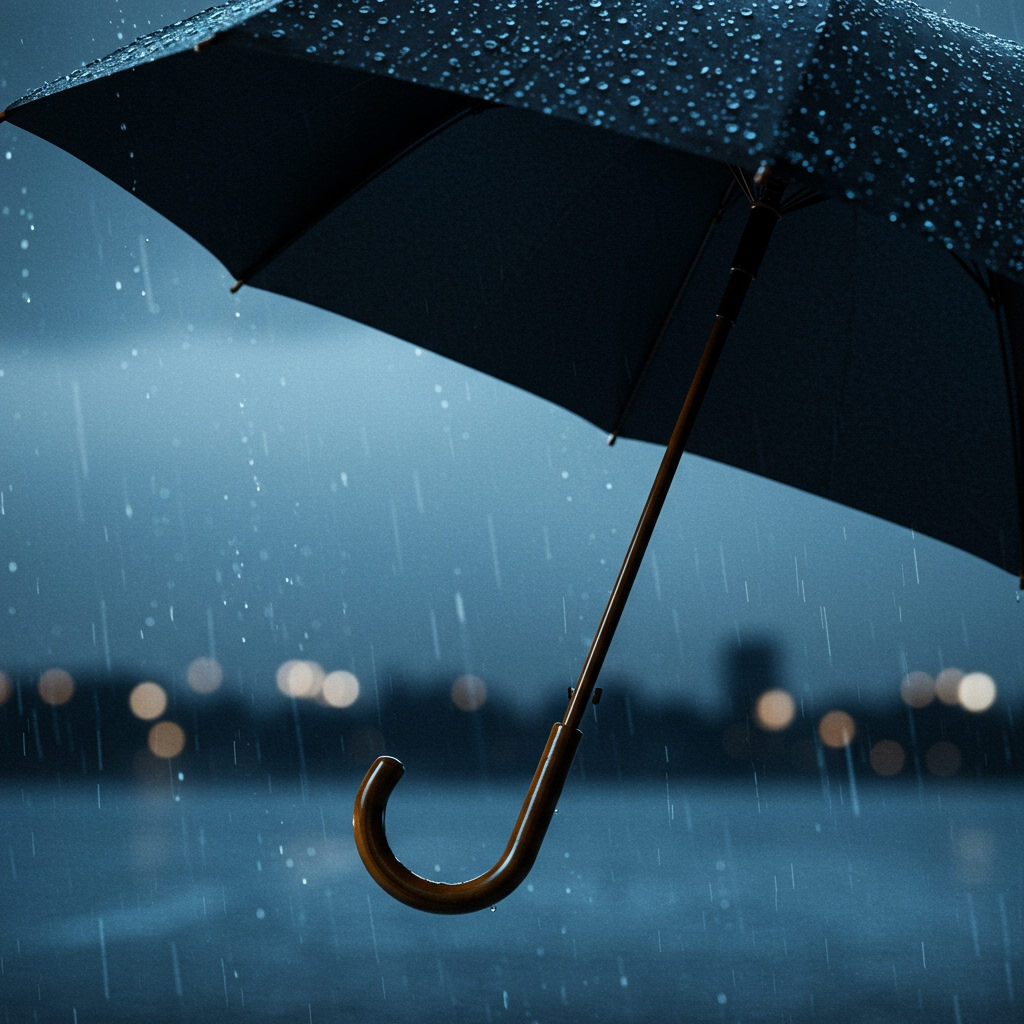

In [22]:
# Generate Image
img_response = client.models.generate_images(
    model='imagen-3.0-generate-002',
    prompt='An umbrella in the foreground, and a rainy night sky in the background',
    config=types.GenerateImagesConfig(
        negative_prompt='human',
        number_of_images=1,
        include_rai_reason=True,
        output_mime_type='image/jpeg',
    ),
)
img_response.generated_images[0].image.show()

### Image Prompt Enhancement

This example uses Gemini to enhance an image generation prompt, then send that prompt to Imagen 3.

Original Prompt: An umbrella in the foreground, and a rainy night sky in the background
Enhanced Prompt: A lone, tattered umbrella, its crimson silk frayed at the edges and gleaming wetly under the ethereal glow of a bioluminescent rain falling from a sky choked with nebulae. The handle, carved from a gnarled, ancient wood, is wrapped in glowing moss. In the background, colossal alien cityscapes pierce the cloud-sea, lit by flickering holographic advertisements that bleed into the multi-hued rain. The rain itself dances with intricate patterns, leaving shimmering, iridescent trails on the surface of the umbrella. The reflection in the rain-slicked pavement below reveals not the city above, but a glimpse of a vast, star-strewn ocean, hinting at a hidden depth beneath the augmented reality.



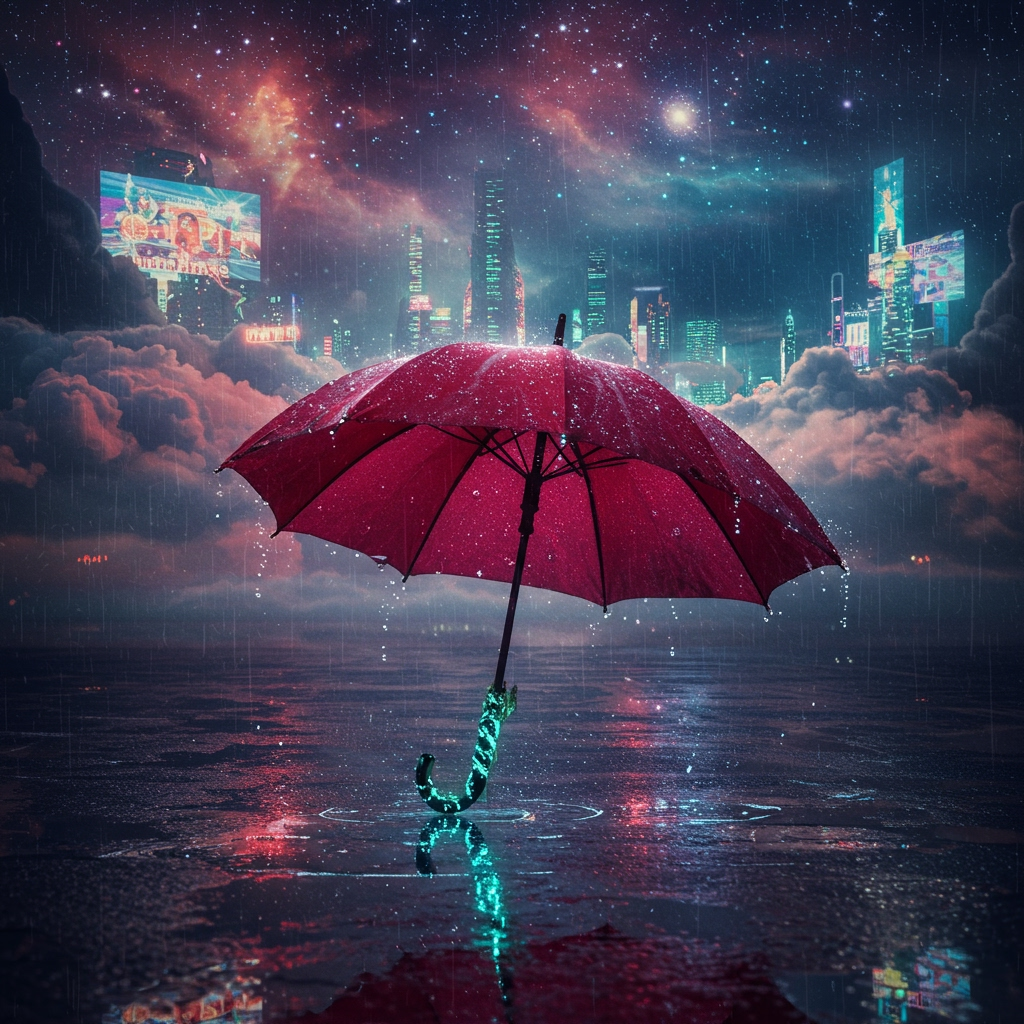

In [25]:
from google import genai
from google.genai import types
from google.genai.types import ToolConfig, FunctionCallingConfig, GenerateContentConfig, FunctionCallingConfigMode
from IPython.display import Markdown

# Ask Gemini to enhance a prompt
image_prompt = "An umbrella in the foreground, and a rainy night sky in the background"

response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents="Enhance this image prompt, be very creative, provide only a single enhanced prompt: " + image_prompt,
)

enhanced_prompt = response.text

# Output the original and enhanced prompts
print(f"Original Prompt: {image_prompt}")
print(f"Enhanced Prompt: {enhanced_prompt}")


# Use the enhanced prompt to generate the image
img_response = client.models.generate_images(
    model='imagen-3.0-generate-002',
    prompt=enhanced_prompt,
    config=types.GenerateImagesConfig(
        negative_prompt='human',
        number_of_images=1,
        include_rai_reason=True,
        output_mime_type='image/jpeg',
    ),
)
img_response.generated_images[0].image.show()

## Multimodal Structured Prompts

For the first time, we are going to use a list to contain the different parts of the prompt. This can be done in a variety of ways,

Provide a single string as shown in the text example above:

```python
contents='Can you recommend some things to do in Boston and New York in the winter?'
```
Provide a single Content instance with multiple Part instances:
```python
contents=types.Content(parts=[
    types.Part.from_text(text='Can you recommend some things to do in Boston in the winter?'),
    types.Part.from_text(text='Can you recommend some things to do in New York in the winter?')
], role='user')
```

When sending more than one input type, provide a list with multiple Content instances:
```python
contents=[
    'What is this a picture of?',
    types.Part.from_uri(
        file_uri='gs://generativeai-downloads/images/scones.jpg',
        mime_type='image/jpeg',
    ),
]
```

Learn more at:
*   **How to structure contents:** https://googleapis.github.io/python-genai/#how-to-structure-contents
*   **genai.types.Part:** https://googleapis.github.io/python-genai/genai.html#genai.types.Part


In [24]:
# Here, we use Part.from_bytes() to send the image that was generated in the previous cell.
# Note that we need to provide both the image bytes and the mime_type.
prompt = [
        types.Part.from_bytes(
            data=img_response.generated_images[0].image.image_bytes,
            mime_type=img_response.generated_images[0].image.mime_type
            ),
        "Describe the above image"
        ]

# Send the request
response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents=prompt
)

Markdown(response.text)

The image portrays a surreal and futuristic scene of a city sheltered under a luminous, cyan-colored umbrella, all set against a rainy backdrop.

The umbrella itself is translucent, revealing a complex pattern of light and dark areas underneath. Its edges are adorned with small, bright green dots, and its handle is a simple black rod. The city beneath the umbrella is equally futuristic, with sleek, glowing buildings that appear to be constructed from a material that emits light. Circular elements with a clockwork aesthetic are integrated into the city's design.

Raindrops are falling heavily around the scene, and the ground, composed of brick pavers, is wet and reflective. The reflections of the luminous city and umbrella create an eerie and magical ambiance. The sky in the background is a mix of dark blues and blacks, indicating a nighttime setting or a heavy storm. Overall, the image conveys a sense of protection and innovation in a world beset by inclement weather.


## Simple Example: Using Python Requests Library

In [26]:
import requests

html_url="https://arxiv.org/html/1706.03762v7"

# Get the contents of the HTML URL using the Python Requests library
content = requests.get(html_url).content

# Create a multi-part prompt
prompt = [
    content,
    "Summarize the above content"
]

# Generate our response
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

This document is the research paper "Attention Is All You Need," introducing the Transformer model architecture, which relies solely on attention mechanisms, eschewing recurrence and convolutions. The paper argues that this architecture allows for more parallelization and achieves state-of-the-art translation quality with significantly less training time. It details the model architecture, including encoder and decoder stacks, multi-head attention, and positional encoding. The authors compare self-attention to recurrent and convolutional layers, highlighting its computational efficiency and ability to capture long-range dependencies. The paper discusses training details, regularization techniques, and presents results on machine translation tasks (English-German, English-French) where the Transformer outperforms existing models. Finally, they demonstrate the model's generalizability by applying it to English constituency parsing. The code for the model is available on GitHub.


### Multimodal Prompting: PDF Example
Let's practice sending a PDF and summarizing it.

In [27]:
pdf_url = "https://arxiv.org/pdf/1706.03762"

# Get the contents of the PDF URL using the Python Requests library
content = requests.get(pdf_url).content

pdf_part = types.Part.from_bytes(
      data=content,
      mime_type="application/pdf" # <=== Set the MIME TYPE to 'application/pdf'
    )
# Create a multi-part prompt
prompt = [
    pdf_part,
    "Summarize the above content"
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

Here's a summary of the paper "Attention is All You Need," which introduces the Transformer architecture:

*   **The Problem:** Traditional sequence transduction models (like those used for machine translation) rely on recurrent or convolutional neural networks. These models can be slow to train because they require sequential computation.

*   **The Solution: The Transformer:** This paper proposes a new architecture called the Transformer. It relies entirely on attention mechanisms, eliminating recurrence and convolutions. Attention allows for parallel computation, speeding up training.

*   **Key Components:**
    *   **Self-Attention:**  Allows the model to relate different positions within the same input sequence, enabling it to understand relationships between words in a sentence.
    *   **Multi-Head Attention:** Performs attention multiple times in parallel, allowing the model to capture different types of relationships within the data.
    *   **Encoder-Decoder Structure:**  The Transformer uses an encoder to process the input and a decoder to generate the output, similar to other sequence-to-sequence models.
    *   **Positional Encoding:**  Since the model doesn't have recurrence, positional encodings are added to the input to provide information about the order of the words.

*   **Results:** The Transformer achieves state-of-the-art results on machine translation tasks, surpassing previous models in both quality (BLEU score) and training speed. The model also generalizes well to English constituency parsing.

*   **Key Advantages:**
    *   **Parallelization:**  Faster training due to the elimination of sequential computation.
    *   **Long-Range Dependencies:** Attention allows the model to easily capture relationships between distant words in a sequence.
    *   **Interpretability:** The attention mechanism provides insights into how the model is relating different parts of the input sequence.


---
---

## Using Playwright to Screenshot Pages

This example uses [Playwright](https://playwright.dev/) to visit a page and take a full-page screenshot which is then sent to Gemini for summarization.

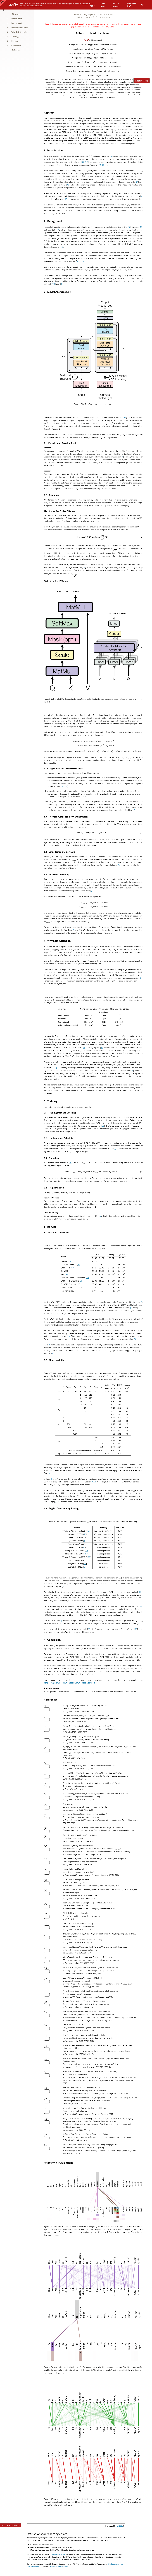

In [28]:
# Use playwright to visit a URL and take a screenshot of the entire page which is saved to a local file.

from playwright.async_api import async_playwright
from playwright.sync_api import sync_playwright
import playwright
import asyncio
from IPython.display import Image

# Colab runs in an async runloop, so we'll write this as an async function
async def fetch_page_image(url: str = ""):
    async with async_playwright() as p:
        # Generate a filename using the url, but use only the domain and path, delimited by an underscore (_)
        filename = url.replace("https://", "").replace("http://", "").replace("/", "_") + ".png"
        browser = await p.chromium.launch()
        page = await browser.new_page()
        await page.goto(url)
        await page.screenshot(path=f"{filename}", full_page=True)
        # Get the HTML content
        html_content = await page.content()
        await browser.close()
        # Return the image bytes and HTML content
        return filename, open(f"{filename}", "rb").read(), html_content


image_filename, image_bytes, html_content = await fetch_page_image("https://arxiv.org/html/1706.03762v7")

# Display the image in path "example.png" but scaled to 100 pixels wide
Image(filename=image_filename, width=800)

In [29]:
# Upload the file using the API

from pydantic import BaseModel, Field
from google.cloud import storage
from google import genai
from google.genai import types
import pprint

class ArxivExtractionModel(BaseModel):
  page_summary: str = Field(description="A summary of the provided webpage")
  authors: list[str] = Field(description="The name(s) of the authors.")
  references: list[str] = Field(description="Every reference cited in the paper")

# If using GCP (PROJECT_ID is defined), create a "Part" from the image bytes we already have in memory,
# otherwise (PROJECT_ID is empty), we're using AI Studio, so upload the file using the
if PROJECT_ID != "":

  if BUCKET == "":
    # Create image part from existing bytes stored in memory
    image_part = types.Part.from_bytes(data=image_bytes, mime_type="image/png")
  else:
    # Alternative: Upload the file to GCS and use a Part.from_uri
    storage_client = storage.Client(project=PROJECT_ID)
    bucket = storage_client.bucket(BUCKET)
    blob = bucket.blob(image_filename)
    blob.upload_from_filename(image_filename)

    gcs_uri = f'gs://{bucket.name}/{blob.name}'

    image_part = types.Part.from_uri(
      file_uri=gcs_uri,
      mime_type="image/png"
    )

else:
  file_upload = client.files.upload(path=image_filename)
  image_part=types.Part.from_uri(
                    file_uri=file_upload.uri,
                    mime_type=file_upload.mime_type)

# Use a multi-part structured prompt
prompt = ["# Web Page Image",
          image_part,
          "# Web Page HTML Content",
          html_content,
          "Summarize the web page screenshot and HTML content. Then condense the information contained within. format everyting in Markdown."
          ]

config = types.GenerateContentConfig(
    response_schema=ArxivExtractionModel,
    response_mime_type="application/json",
    system_instruction=None
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=config,
)

# Parse the structured response. This can be done using `response.parsed` (Method 1)
# or through explicit casting/model validation (Method 2)

# Method 1: Use "response.parsed" to get the response cast into ArxivExtractionModel
parsed_response = response.parsed

# Method 2: Use explicit casting (not used, but equivalent to Method 1)
cast_response = ArxivExtractionModel.model_validate_json(response.text)

# Print the results
print(parsed_response.model_dump_json(indent=2))
print("---")
Markdown(parsed_response.page_summary)

{
  "page_summary": "This web page presents a research paper titled \"Attention Is All You Need,\" which introduces the Transformer model, a novel neural network architecture based solely on attention mechanisms. The paper challenges the dominance of recurrent and convolutional networks in sequence transduction tasks like machine translation. The authors detail the model's architecture, including encoder and decoder stacks with multi-head attention and feed-forward networks, and compare its performance with existing models. The Transformer achieves state-of-the-art BLEU scores on English-to-German and English-to-French translation tasks while requiring significantly less training time and computational resources. The paper also discusses why self-attention is effective, explores model variations, and demonstrates the Transformer's generalization ability by applying it to English constituency parsing. The appendix includes attention visualizations to help with model interpretability. Th

This web page presents a research paper titled "Attention Is All You Need," which introduces the Transformer model, a novel neural network architecture based solely on attention mechanisms. The paper challenges the dominance of recurrent and convolutional networks in sequence transduction tasks like machine translation. The authors detail the model's architecture, including encoder and decoder stacks with multi-head attention and feed-forward networks, and compare its performance with existing models. The Transformer achieves state-of-the-art BLEU scores on English-to-German and English-to-French translation tasks while requiring significantly less training time and computational resources. The paper also discusses why self-attention is effective, explores model variations, and demonstrates the Transformer's generalization ability by applying it to English constituency parsing. The appendix includes attention visualizations to help with model interpretability. The code used for training and evaluation is available on GitHub.

# 9.0 - Developing Agents

## CrewAI Agent
This sample CrewAI agent first generates a list of planets, then randomly selects one before sharing 3 facts about the selected planet.

In [30]:
from typing import Type, List, Optional
from pydantic import BaseModel, Field
from crewai import LLM, Task, Agent, Crew
from crewai.tools import BaseTool
import random
from IPython.display import display, Markdown


class SolarSystem(BaseModel):
    planets: List[str] = Field(..., description="A python list containing planet names")

class PlanetSelectorTool(BaseTool):
  name: str = "random_planet_selector"
  description: str = "Select a random planet from an SolarSystem instance"
  args_schema: Type[BaseModel] = SolarSystem

  def _run(self, planets: List[str] ) -> str:
    planet = random.choice(planets)
    display(Markdown(f"Selected planet: {planet}"))
    return planet

tool_planet_selector = PlanetSelectorTool()

llm = LLM(
    model="vertex_ai/gemini-2.0-flash-001",
)

# Create an agent using the custom LLM
agent = Agent(
    role="AI Assistant",
    goal="Provide helpful responses",
    backstory="I am an AI assistant created to help users.",
    llm=llm,
    verbose=True
)

task_planet_list=Task(
    description="List all planets in the solar system",
    expected_output="A list of planets",
    output_pydantic=SolarSystem,
    agent=agent
)

task_planet_selector=Task(
    description="Select a random planet from this list:",
    expected_output="The name of the selected planet",
    agent=agent,
    tools=[tool_planet_selector],
    context=[task_planet_list]
)

# Create tasks for the agent
task_facts = Task(
    description="Provide 3 facts about the following planet",
    expected_output="Respond to user queries",
    agent=agent,
    context=[task_planet_selector]
)

# Create the crew with the agent and task
crew = Crew(
    agents=[agent],
    tasks=[task_planet_list, task_planet_selector, task_facts],
)

response = crew.kickoff()

Markdown(response.raw)

# Agent: AI Assistant
## Task: List all planets in the solar system


# Agent: AI Assistant
## Final Answer: 
{
  "planets": ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
}


# Agent: AI Assistant
## Task: Select a random planet from this list:


Selected planet: Uranus



# Agent: AI Assistant
## Using tool: random_planet_selector
## Tool Input: 
"{\"planets\": [\"Mercury\", \"Venus\", \"Earth\", \"Mars\", \"Jupiter\", \"Saturn\", \"Uranus\", \"Neptune\"]}"
## Tool Output: 
Uranus


# Agent: AI Assistant
## Final Answer: 
Uranus


# Agent: AI Assistant
## Task: Provide 3 facts about the following planet


# Agent: AI Assistant
## Final Answer: 
Here are 3 facts about Uranus:

1.  Uranus is an ice giant planet with aUnique Atmosphere: Unlike gas giants, Uranus's atmosphere contains a higher proportion of icy materials like water, ammonia, and methane. This composition contributes to its distinct bluish-green hue.

2.  Uranus has an extreme axial tilt: Uranus rotates on its side, with an axial tilt of 98 degrees. This means that its poles are located where most other planets have their equators. This unusual orientation leads to extreme seasonal variations.

3.  Uranus has a ring system and numerous moons: Similar to other gas giants, Uranus possesses a

Here are 3 facts about Uranus:

1.  Uranus is an ice giant planet with aUnique Atmosphere: Unlike gas giants, Uranus's atmosphere contains a higher proportion of icy materials like water, ammonia, and methane. This composition contributes to its distinct bluish-green hue.

2.  Uranus has an extreme axial tilt: Uranus rotates on its side, with an axial tilt of 98 degrees. This means that its poles are located where most other planets have their equators. This unusual orientation leads to extreme seasonal variations.

3.  Uranus has a ring system and numerous moons: Similar to other gas giants, Uranus possesses a ring system, although it is not as prominent as Saturn's. It also has a diverse collection of 27 known moons, named after characters from Shakespearean plays.

# 10.0 - Resources

## Gemini Code Samples
- Gemini Cookbook: https://github.com/google-gemini/cookbook
- Google Cloud Generative AI: https://github.com/GoogleCloudPlatform/generative-ai
- Google Cloud Applied AI Engineering: https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples

---
---
## Andrej Karpathy's YouTube Video Series
Andrej Karpathy is a computer scientist specializing in AI, deep learning, and neural networks. Born in 1986, he holds a Ph.D. from Stanford, where he also created the CS 231n deep learning course. Karpathy was a founding member of OpenAI and served as Director of AI at Tesla, leading the Autopilot computer vision team. In 2024, he founded Eureka Labs, an AI education company.

### Video 1: [Dive Deep Into LLMs](https://youtu.be/7xTGNNLPyMI)
**URL:** https://youtu.be/7xTGNNLPyMI

This thorough deep dive explains LLMs starting with pre-training, fine-tuning, and ending reinforcement learning while keeping the math to an absolute minimum. The insights presented in this video will help you optimize and maximize the value of your LLM projects.

### Video 2: [Neural Networks: Zero to Hero](https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)
**URL:** https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ

This playlist covers many topics in machine learning and LLMs,including a 2-hour video titled "[Let's build GPT: from scratch, in code, spelled out.](https://youtu.be/kCc8FmEb1nY)" which walks developers through the process of building a basic GPT-style model.



